## 선형 회귀

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1000개의 데이터 포인트를 만듭니다. x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성합니다.<br>y1은 x1의 데이터를 이용해 기울기는 0.1, y 절편은 0.3인 방정식을 이용해 만듭니다.<br>이때 y 절편에 평균값 0, 표준편차 0.03인 정규분포를 더하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만듭니다.  

In [14]:
num_points = 1000
vectors_set = []
for i in range(num_points):
     x1 = np.random.normal(0.0, 0.55)
     y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
     vectors_set.append([x1, y1])

vectors_set는 list of list, 즉 2차원 배열로 이루어져 있습니다.<br>2차원의 첫번째 요소를 x_data에 두번째 요소를 y_data로 저장합니다.

In [15]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

x, y 좌표에 x_data, y_data 를 사용하여 붉은색 원으로 산포도를 그립니다.

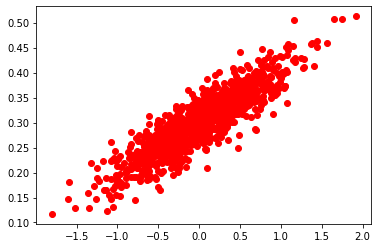

In [16]:
plt.plot(x_data, y_data, 'ro')
plt.show()

텐서플로우 패키지를 로드합니다.

In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

-1~1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만듭니다.<br>바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서입니다.

In [18]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss 함수를 정의하고 최적화 방법은 학습속도 0.5인 그래디언트 디센트를 사용합니다.

In [19]:
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

모든 변수를 초기화하고 세션을 시작합니다.

In [22]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

16번 반복하면서 train을 실행시킵니다.<br>반복마다 W, b 값의 변화를 프린트하고 그래프로 직선의 기울기의 변화를 살펴봅니다.

0 [0.55831933] [0.3054338] 0.06251841


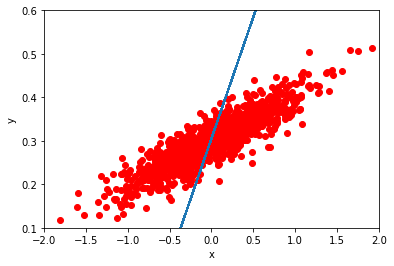

1 [0.42313126] [0.30398816] 0.03137682


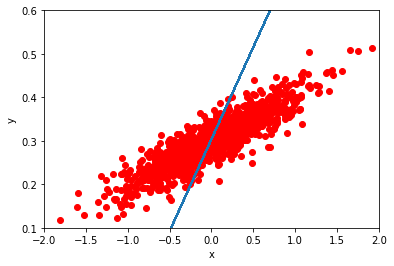

2 [0.32798797] [0.30298755] 0.015952049


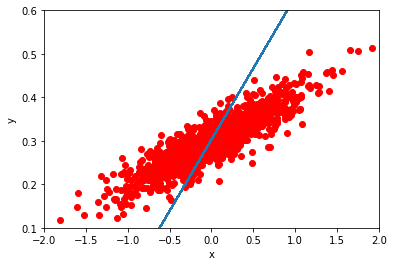

3 [0.2610277] [0.30228335] 0.008311987


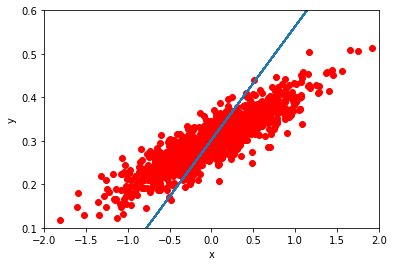

4 [0.21390215] [0.30178776] 0.004527778


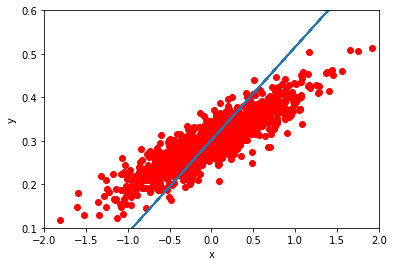

5 [0.18073598] [0.30143896] 0.0026534179


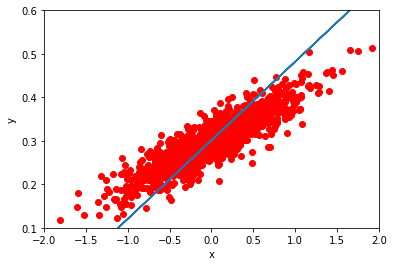

6 [0.15739417] [0.30119348] 0.0017250265


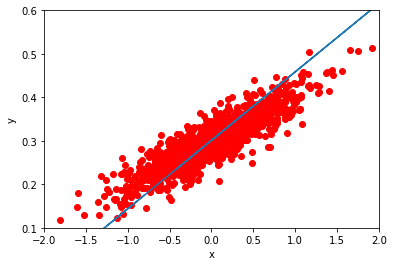

7 [0.1409666] [0.3010207] 0.0012651837


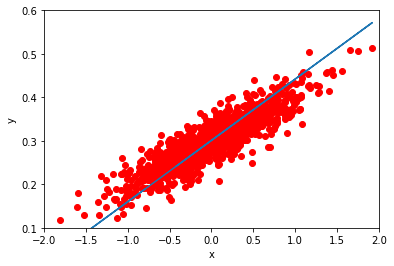

8 [0.12940514] [0.30089912] 0.0010374186


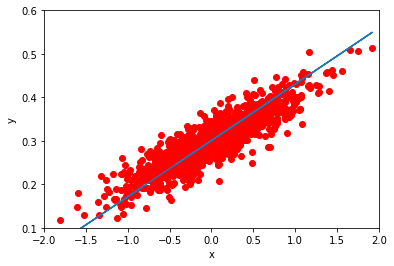

9 [0.12126838] [0.30081356] 0.00092460396


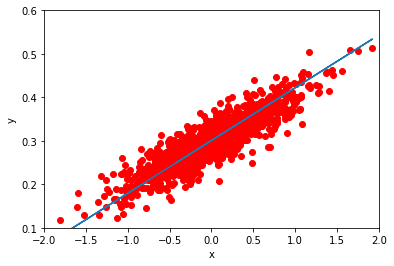

10 [0.11554187] [0.30075333] 0.00086872553


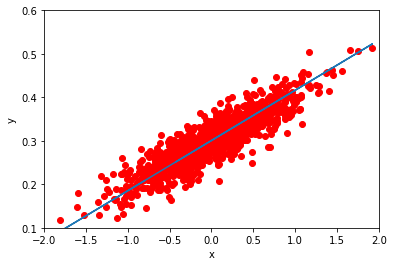

11 [0.11151164] [0.30071095] 0.00084104843


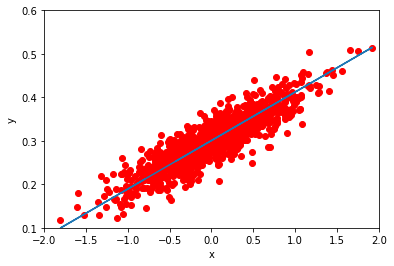

12 [0.10867523] [0.3006811] 0.0008273398


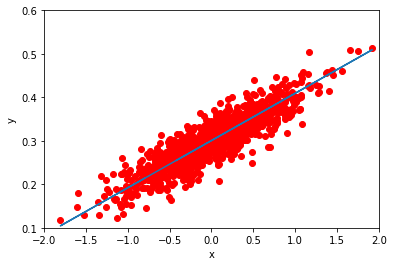

13 [0.10667901] [0.3006601] 0.0008205496


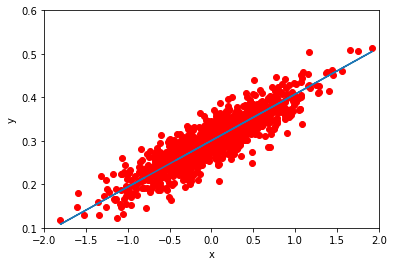

14 [0.10527411] [0.30064535] 0.00081718643


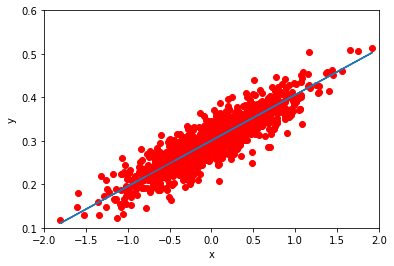

15 [0.10428537] [0.30063495] 0.00081552047


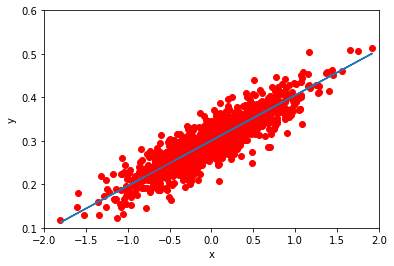

In [23]:
for step in range(16):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    # 산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1,0.6)
    plt.ylabel('y')
    plt.show()